In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import pandas as pd

# Access the file in Colab
file_path = '/content/drive/MyDrive/Colab Notebooks/iot_devices_train.csv'
train_data = pd.read_csv(file_path)

# Now you can use the 'train_data' DataFrame in your analysis

In [ ]:
# Separate the features and the target variable
X_train = train_data.drop('device_category', axis=1)
y_train = train_data['device_category']

# Now you can use the 'X_train' DataFrame for features and 'y_train' Series for the target variable in your analysis

In [ ]:
# Perform feature scaling if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
#load the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
#import the training dataset and shuffle it
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iot_devices_train.csv")
df = df.sample(len(df),random_state=42)
df

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
521,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,watch
737,9,5,5,1213,654,0.829948,668,0,0,1.5756,...,0,0,0,0,0,0,0,0,0,motion_sensor
740,7,3,4,1039,370,0.553063,668,0,0,0.7836,...,0,0,0,0,0,0,0,0,0,motion_sensor
660,9,5,5,1213,743,0.897990,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,baby_monitor
411,0,0,0,240,0,0.000000,240,0,64,1.5151,...,0,0,0,1,0,0,0,0,0,water_sensor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,9,5,5,1213,743,1.806874,668,0,0,0.0411,...,0,0,0,0,0,0,0,0,0,TV
270,9,5,5,1213,743,1.202739,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,smoke_detector
860,0,0,0,240,0,0.000000,240,0,64,1.5739,...,0,0,0,1,0,0,0,0,0,lights
435,0,0,0,240,0,0.000000,240,0,64,1.4993,...,0,0,0,1,0,0,0,0,0,water_sensor


In [ ]:
#preprocess the dataset by checking the null values
df.isnull().sum()

ack                         0
ack_A                       0
ack_B                       0
bytes                       0
bytes_A                     0
                           ..
suffix_is_googleapis.com    0
suffix_is_net               0
suffix_is_org               0
suffix_is_unresolved        0
device_category             0
Length: 298, dtype: int64

In [ ]:
#total number of distint classes
[print(k) for k in list(df["device_category"].unique())]

watch
motion_sensor
baby_monitor
water_sensor
lights
TV
security_camera
socket
smoke_detector
thermostat


[None, None, None, None, None, None, None, None, None, None]

In [ ]:
#define X,y for classification problem
X_train = df.drop('device_category', axis=1)
y_train = df['device_category']

In [ ]:
#select 30 best features based on f score
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=30)
X_train_selected = selector.fit_transform(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  7  11  13  18  21  23  24  25  26  27  28  29  30  31  32  42  47  52
  55  57  62  65  67  72  75  77  82  85 118 120 121 128 130 131 138 140
 141 156 157 158 159 160 161 162 163 164 165 166 167 168 169 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 211 216
 219 240 242 243 244 245 246 247 248 249 252 253 254 255 256 257 258 261
 262 263 264 265 267 268 269 270 271 272 274 275 277 279 280 281 282 283
 284 285 286 287 288 290 292 293 294 295 296] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
#scale the features
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train_selected)

In [ ]:
#encode the Y labels for the model
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y_train_encoded = encode.fit_transform(y_train)

In [ ]:
#define the model and fit the training data
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
#load testing dataset and apply the transformations
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iot_devices_test.csv")
X_test = df_test.drop('device_category', axis=1)
y_test = df_test['device_category']
X_test_selected = selector.transform(X_test)
X_test_scaled = scale.transform(X_test_selected)
y_test_encoded = encode.transform(y_test)
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,7.778141,7.361024,6.414468,30.938519,21.781869,-0.653461,-0.910851,-0.751797,2.978680,-0.669432,...,-0.992089,-0.992089,-0.992089,-0.992089,-0.992089,-0.153090,-0.472251,-0.823628,-0.750176,-0.648425
1,7.778141,7.361024,6.414468,30.938519,21.781869,-0.653461,-0.911228,-0.751797,2.978680,-0.669657,...,-0.992089,-0.992089,-0.992089,-0.992089,-0.992089,-0.148013,-0.472251,-0.823628,-0.750176,-0.648425
2,7.778141,7.361024,6.414468,31.082056,21.781869,-0.653461,-0.911215,-0.751797,2.978680,-0.669671,...,-0.992089,-0.992089,-0.992089,-0.992089,-0.992089,-0.136663,-0.472251,-0.823628,-0.729586,-0.648425
3,7.778141,7.361024,6.414468,31.082056,21.781869,-0.653461,-0.911199,-0.751797,2.850040,-0.669689,...,-0.992089,-0.992089,-0.992089,-0.992089,-0.992089,-0.136962,-0.472251,-0.823628,-0.739881,-0.648425
4,8.510960,7.361024,7.734408,31.306334,22.317262,-0.653461,-0.910987,-0.751797,3.235053,-0.669354,...,-0.992089,-0.992089,-0.992089,-0.992089,-0.992089,-0.061724,-0.472251,-0.823628,-0.739881,-0.648425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,62.983841,49.777491,63.611868,473.561484,599.477240,-0.653461,-0.911195,-0.751797,5.935098,-0.669242,...,-0.992089,-0.992089,-0.992089,-0.992089,-0.992089,-1.035609,-0.587648,-0.940072,-0.554566,-0.648425
896,4.358319,4.268157,3.334608,15.353472,14.494570,-0.653461,-0.898293,-0.747878,2.291966,-0.657143,...,-0.992089,-0.992089,-0.992089,-0.992089,-0.992089,-1.019447,-0.577158,-0.823628,-0.544271,-0.648425
897,3.381227,2.500804,3.334608,13.877725,14.411287,-0.653461,-0.908755,-0.751530,2.291966,-0.667893,...,-0.992089,-0.992089,-0.992089,-0.992089,-0.992089,-1.041925,-0.598139,-0.950658,-0.564861,-0.648425
898,5.823957,4.709995,5.534508,15.651761,15.758693,-0.653461,-0.884472,-0.747703,2.781235,-0.654214,...,-0.992089,-0.992089,-0.992089,-0.992089,-0.992089,-1.031996,-0.587648,-0.940072,-0.554566,-0.648425


model transformed into table
same transformations in testing & train dataset

In [ ]:
#predict from the model
y_pred = model.predict(X_test_scaled)

<Axes: >

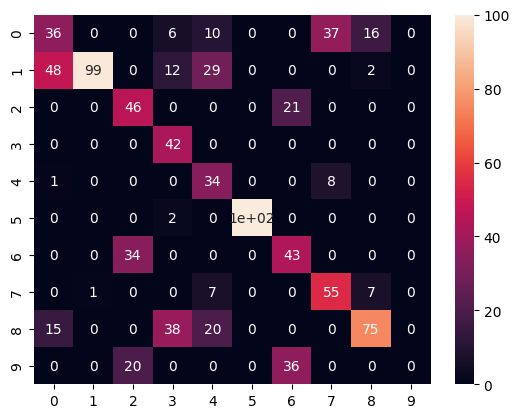

In [ ]:
#evaluate the model using Confusion Matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_pred,y_test_encoded),annot=True)

diagnols represent how much is right.
diagnols tells konsi class ka sahi prediction hai

In [ ]:
#classification report
print(classification_report(y_pred,y_test_encoded))

              precision    recall  f1-score   support

           0       0.36      0.34      0.35       105
           1       0.99      0.52      0.68       190
           2       0.46      0.69      0.55        67
           3       0.42      1.00      0.59        42
           4       0.34      0.79      0.48        43
           5       1.00      0.98      0.99       102
           6       0.43      0.56      0.49        77
           7       0.55      0.79      0.65        70
           8       0.75      0.51      0.60       148
           9       0.00      0.00      0.00        56

    accuracy                           0.59       900
   macro avg       0.53      0.62      0.54       900
weighted avg       0.64      0.59      0.58       900



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
